1. Importing Libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

2. Load Dataset


In [3]:
anemia_dataset = pd.read_csv('anemia.csv')

In [4]:
anemia_dataset.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [5]:
anemia_dataset.isnull()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1416,False,False,False,False,False,False
1417,False,False,False,False,False,False
1418,False,False,False,False,False,False
1419,False,False,False,False,False,False


In [6]:
anemia_dataset.shape

(1421, 6)

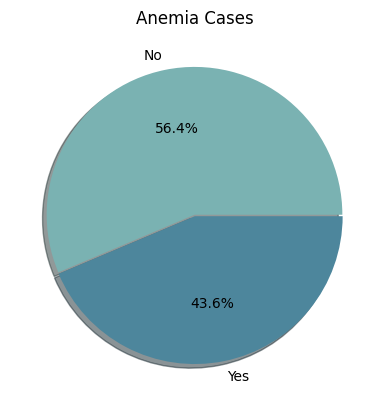

In [16]:
import matplotlib.pyplot as plt
plt.title('Anemia Cases')
plt.pie(anemia_dataset['Result'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#7AB2B2', '#4D869C'], explode=(0.01, 0), shadow=True)
plt.show()

In [ ]:
anemia_dataset['Result'].value_counts()

Result
0    801
1    620
Name: count, dtype: int64

In [ ]:
# memiahkan data dan label
X = anemia_dataset.drop (columns='Result',axis=1)
Y = anemia_dataset['Result']

In [ ]:
print(X)

      Gender  Hemoglobin   MCH  MCHC   MCV
0          1        14.9  22.7  29.1  83.7
1          0        15.9  25.4  28.3  72.0
2          0         9.0  21.5  29.6  71.2
3          0        14.9  16.0  31.4  87.5
4          1        14.7  22.0  28.2  99.5
...      ...         ...   ...   ...   ...
1416       0        10.6  25.4  28.2  82.9
1417       1        12.1  28.3  30.4  86.9
1418       1        13.1  17.7  28.1  80.7
1419       0        14.3  16.2  29.5  95.2
1420       0        11.8  21.2  28.4  98.1

[1421 rows x 5 columns]


In [ ]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64


3. Splitting Training data and Testing data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1421, 5) (1136, 5) (285, 5)


4. Creating training data using the SVM algorithm


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

5. Creating an evaluation model to measure accuracy


In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy of training data is = ', training_data_accuracy)

Accuracy of training data is =  0.9920774647887324


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy of testing data =', test_data_accuracy)

Accuracy of testing data = 0.9859649122807017


6. Creating a prediction model


In [ ]:
input_data = (0,15.2,27,32.4,71.6)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The patient does not have anemia')
else:
    print('The patient has anemia')


[0]
The patient does not have anemia


c:\Users\gunna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


7. Save the model


In [ ]:
import pickle

In [ ]:
filename = 'anemia_model.sav'
pickle.dump(classifier, open(filename,'wb'))